<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/QuantumToyAlgorithm_CHSHGate_03_Gemini_mkbahk_20250414.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install qiskit[visualization]==1.2.4
%pip install qiskit-aer==0.15.1
%pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 4.8 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=c8c3bcc991ce9cdd86bce4eed7a47a03009eec904358c3c7d993ee1a4ca6b07f
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 47.1 MB/s eta 0:00:00
  Cloning https://github.com/qisk

In [35]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, assemble
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_state_city, plot_bloch_multivector
from qiskit_textbook.tools import array_to_latex
from qiskit_aer import Aer
from IPython.display import display, Math
import numpy as np

In [48]:
# CHSH Game Implementation with Qiskit
import matplotlib.pyplot as plt
from itertools import product

def create_bell_state():
    """Create a Bell state |Φ⁺⟩ = (|00⟩ + |11⟩)/√2"""
    qc = QuantumCircuit(2, 2)
    qc.h(0)  # Apply Hadamard to the first qubit
    qc.cx(0, 1)  # Apply CNOT with control on first qubit, target on second
    return qc
###def

def alice_measurement(qc, x):
    """Apply Alice's measurement based on input x"""
    if x == 1:  # Measure in X basis
        qc.h(0)
    ###if
    # If x == 0, measure in Z basis (standard basis) - no transformation needed
    qc.measure(0, 0)
    return qc
###def

def bob_measurement(qc, y):
    """Apply Bob's measurement based on input y"""
    if y == 0:  # Measure in (Z+X)/√2 basis
        qc.ry(np.pi/4, 1)
    elif y == 1:  # Measure in (Z-X)/√2 basis
        qc.ry(-np.pi/4, 1)
    ###if

    qc.measure(1, 1)
    return qc
###def

def chsh_game(x, y):
    """Run the CHSH game for inputs x and y"""
    # Create Bell state
    qc = create_bell_state()

    # Apply measurements based on inputs
    qc = alice_measurement(qc, x)
    qc = bob_measurement(qc, y)

    # Simulate the circuit
    simulator = Aer.get_backend('qasm_simulator')
    job = simulator.run(qc, shots=1024)
    result = job.result()
    counts = result.get_counts(qc)

    return qc, counts
###def

def check_win(x, y, a, b):
    """Check if the game is won according to the CHSH condition"""
    return (a ^ b) == (x * y)
###def

def analyze_results():
    """Analyze the results of the CHSH game"""
    win_counts = 0
    total_counts = 0

    results = {}
    circuits = {}

    # Try all possible input combinations
    for x, y in product([0, 1], repeat=2):
        qc, counts = chsh_game(x, y)
        circuits[(x, y)] = qc
        results[(x, y)] = counts

        # Calculate win probability for this input combination
        input_total = 0
        input_wins = 0

        for outcome, count in counts.items():
            a = int(outcome[0])
            b = int(outcome[1])
            input_total += count
            if check_win(x, y, a, b):
                input_wins += count
            ###if
        ###for

        win_prob = input_wins / input_total
        print(f"Inputs (x={x}, y={y}): Win probability = {win_prob:.4f}")

        win_counts += input_wins
        total_counts += input_total
    ###for

    # Calculate overall win probability
    overall_win_prob = win_counts / total_counts
    print(f"\nOverall win probability: {overall_win_prob:.4f}")
    print(f"Theoretical quantum limit: {np.cos(np.pi/8)**2:.4f}")

    return circuits, results
###for

In [49]:
# Run the analysis
circuits, results = analyze_results()

# Plot the circuit for one specific input combination (0,0)
print("\nQuantum Circuit for inputs (x=0, y=0):")
print(circuits[(0, 0)])

Inputs (x=0, y=0): Win probability = 0.8369
Inputs (x=0, y=1): Win probability = 0.8613
Inputs (x=1, y=0): Win probability = 0.1367
Inputs (x=1, y=1): Win probability = 0.1475

Overall win probability: 0.4956
Theoretical quantum limit: 0.8536

Quantum Circuit for inputs (x=0, y=0):
     ┌───┐     ┌─┐              
q_0: ┤ H ├──■──┤M├──────────────
     └───┘┌─┴─┐└╥┘┌─────────┐┌─┐
q_1: ─────┤ X ├─╫─┤ Ry(π/4) ├┤M├
          └───┘ ║ └─────────┘└╥┘
c: 2/═══════════╩═════════════╩═
                0             1 


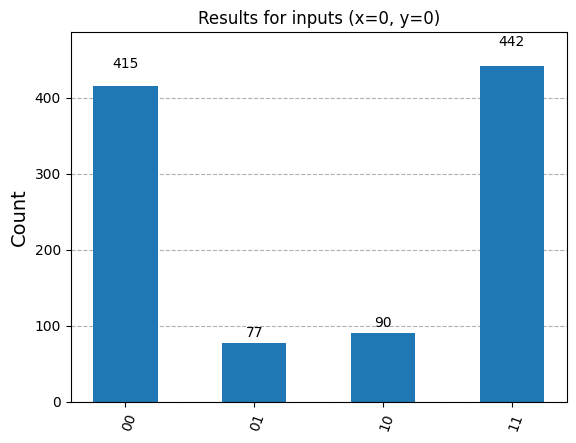

<Figure size 1000x600 with 0 Axes>

In [50]:
# Plot the results histogram for inputs (0,0)
plt.figure(figsize=(10, 6))
plot_histogram(results[(0, 0)], title=f"Results for inputs (x=0, y=0)")
#plt.show()

In [51]:
# Demonstrate the CHSH game logic with a simple example
print("\nCHSH Game Logic Examples:")

for x, y, a, b in product([0, 1], repeat=4):
    win = check_win(x, y, a, b)
    print(f"Inputs (x={x}, y={y}), Outputs (a={a}, b={b}): {'Win' if win else 'Loss'}")
###for


CHSH Game Logic Examples:
Inputs (x=0, y=0), Outputs (a=0, b=0): Win
Inputs (x=0, y=0), Outputs (a=0, b=1): Loss
Inputs (x=0, y=0), Outputs (a=1, b=0): Loss
Inputs (x=0, y=0), Outputs (a=1, b=1): Win
Inputs (x=0, y=1), Outputs (a=0, b=0): Win
Inputs (x=0, y=1), Outputs (a=0, b=1): Loss
Inputs (x=0, y=1), Outputs (a=1, b=0): Loss
Inputs (x=0, y=1), Outputs (a=1, b=1): Win
Inputs (x=1, y=0), Outputs (a=0, b=0): Win
Inputs (x=1, y=0), Outputs (a=0, b=1): Loss
Inputs (x=1, y=0), Outputs (a=1, b=0): Loss
Inputs (x=1, y=0), Outputs (a=1, b=1): Win
Inputs (x=1, y=1), Outputs (a=0, b=0): Loss
Inputs (x=1, y=1), Outputs (a=0, b=1): Win
Inputs (x=1, y=1), Outputs (a=1, b=0): Win
Inputs (x=1, y=1), Outputs (a=1, b=1): Loss
